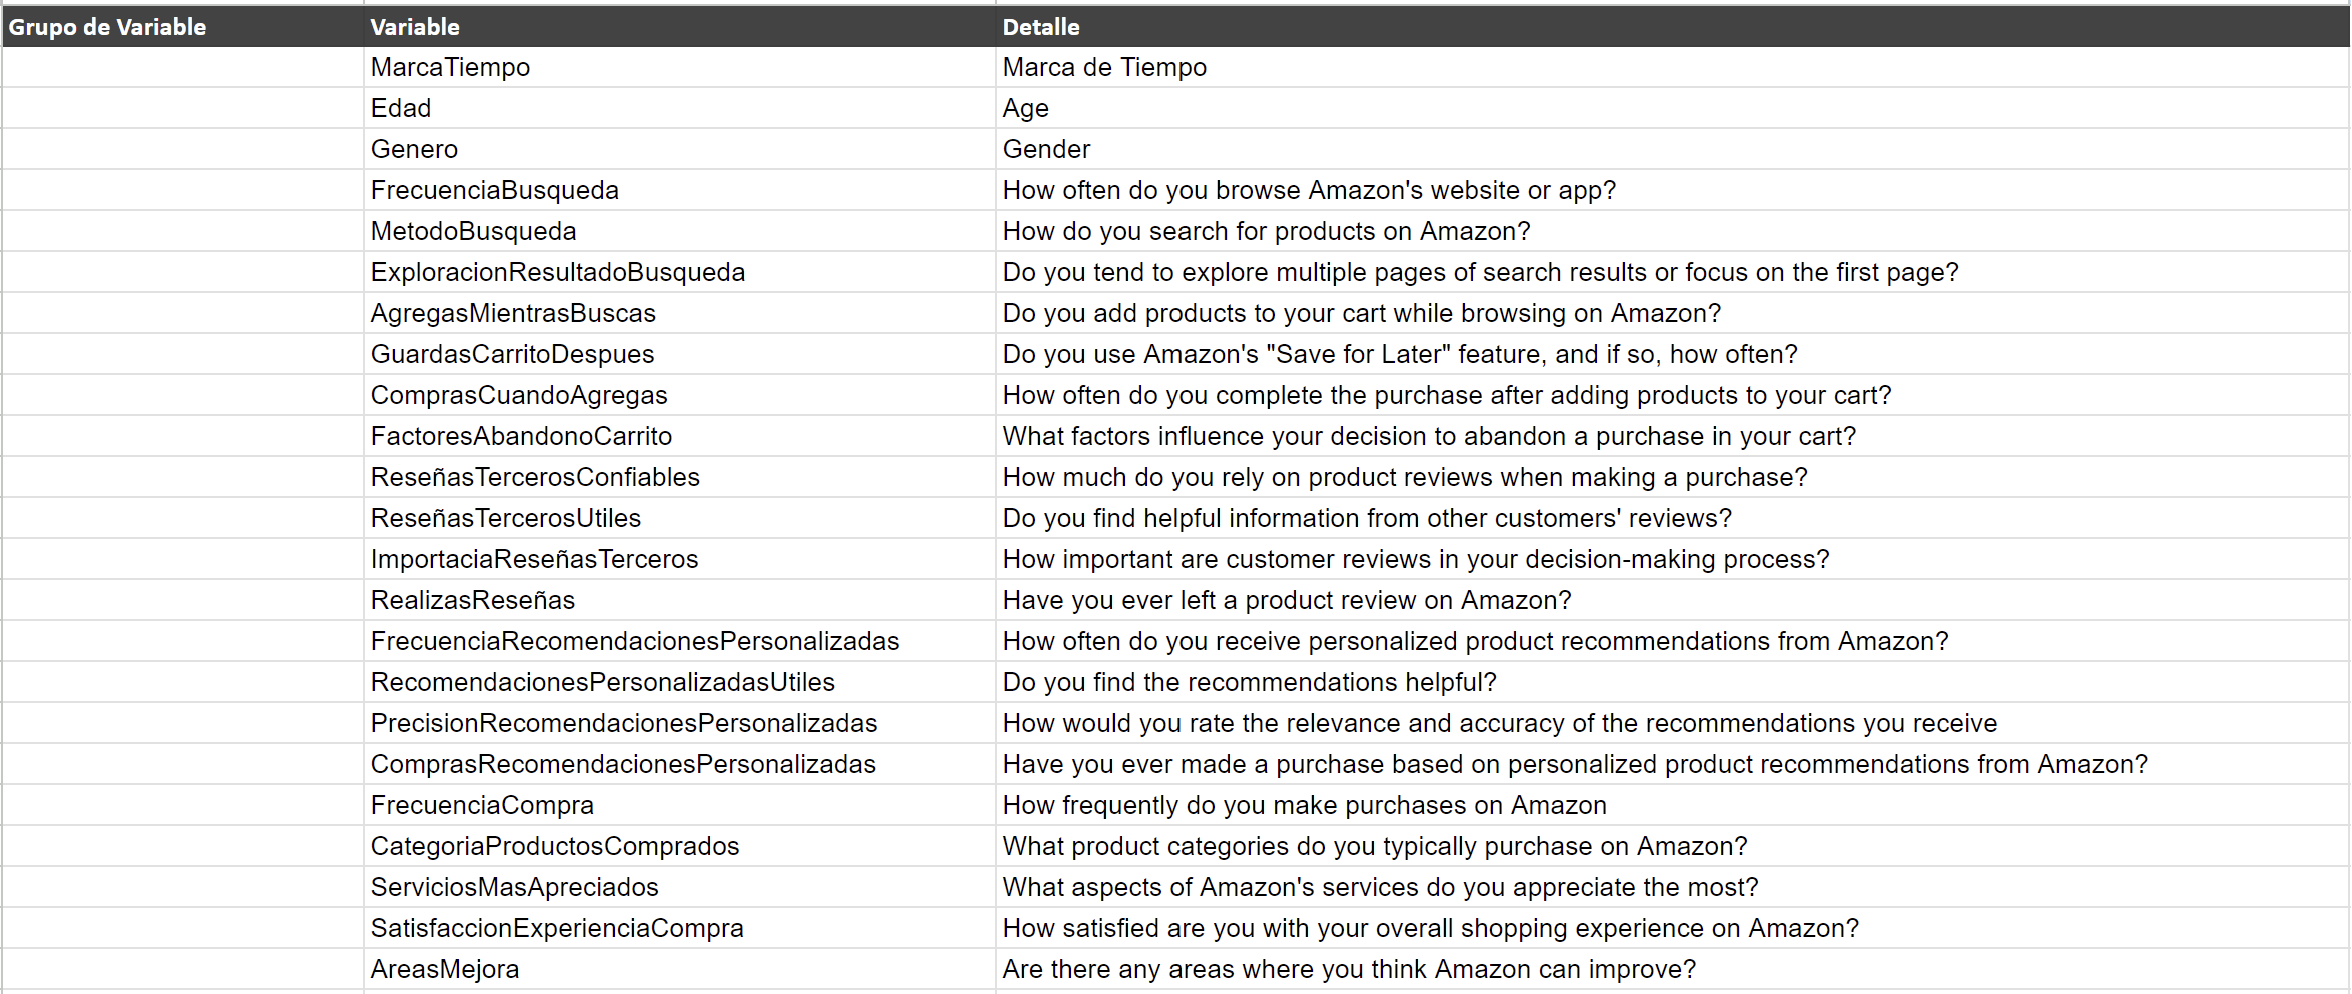

In [ ]:
#from google.colab import drive

#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # show all columns

In [ ]:
df = pd.read_csv('/content/Amazon Customer Behavior Survey.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
# renombrar columna
df.rename({'Timestamp':'MarcaTiempo',	'age':'Edad', 'Gender':'Genero', 'Purchase_Frequency':'FrecuenciaCompra', 'Purchase_Categories':'CategoriaProductosComprados', 'Personalized_Recommendation_Frequency':'ComprasRecomendacionesPersonalizadas', 'Browsing_Frequency':'FrecuenciaBusqueda', 'Product_Search_Method':'MetodoBusqueda', 'Search_Result_Exploration':'ExploracionResultadoBusquedas', 'Customer_Reviews_Importance':'ImportanciaReseñasTerceros', 'Add_to_Cart_Browsing':'AgregasMientrasBuscas', 'Cart_Completion_Frequency':'ComprasCuandoAgregas', 'Cart_Abandonment_Factors':'FactoresAbandonoCarrito', 'Saveforlater_Frequency':'GuardasCarritoDespues', 'Review_Left':'RealizasReseñas', 'Review_Reliability':'ReseñasTercerosConfiables', 'Review_Helpfulness':'ReseñasTercerosUtiles', 'Personalized_Recommendation_Frequency ':'FrecuenciaRecomendacionesPersonalizadas', 'Recommendation_Helpfulness':'RecomendacionesPersonalizadasUtiles', 'Rating_Accuracy ':'PrecisionRecomendacionesPersonalizadas', 'Shopping_Satisfaction':'SatisfaccionExperienciaCompra', 'Service_Appreciation':'ServiciosMasApreciados', 'Improvement_Areas':'AreasMejora'}, axis=1, inplace=True)

In [ ]:
# organizar columnas
df = df[['MarcaTiempo',	'Edad', 'Genero', 'FrecuenciaBusqueda', 'MetodoBusqueda', 'ExploracionResultadoBusquedas', 'AgregasMientrasBuscas', 'GuardasCarritoDespues', 'ComprasCuandoAgregas',  'FactoresAbandonoCarrito', 'ReseñasTercerosConfiables', 'ReseñasTercerosUtiles', 'ImportanciaReseñasTerceros', 'RealizasReseñas', 'FrecuenciaRecomendacionesPersonalizadas', 'RecomendacionesPersonalizadasUtiles', 'PrecisionRecomendacionesPersonalizadas', 'ComprasRecomendacionesPersonalizadas', 'FrecuenciaCompra', 'CategoriaProductosComprados', 'ServiciosMasApreciados', 'SatisfaccionExperienciaCompra', 'AreasMejora']]

In [ ]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   MarcaTiempo                              602 non-null    object
 1   Edad                                     602 non-null    int64 
 2   Genero                                   602 non-null    object
 3   FrecuenciaBusqueda                       602 non-null    object
 4   MetodoBusqueda                           600 non-null    object
 5   ExploracionResultadoBusquedas            602 non-null    object
 6   AgregasMientrasBuscas                    602 non-null    object
 7   GuardasCarritoDespues                    602 non-null    object
 8   ComprasCuandoAgregas                     602 non-null    object
 9   FactoresAbandonoCarrito                  602 non-null    object
 10  ReseñasTercerosConfiables                602 non-null    objec

In [ ]:
# show data
df.head()

,MarcaTiempo,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Sometimes,Found a better price elsewhere,Occasionally,Yes,1,Yes,2,Yes,1,Yes,Few times a month,Beauty and Personal Care,Competitive prices,1,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Few times a month,Keyword,Multiple pages,Yes,Rarely,Often,High shipping costs,Heavily,Yes,1,No,2,Sometimes,3,Yes,Once a month,Clothing and Fashion,Wide product selection,2,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Keyword,Multiple pages,Yes,Rarely,Sometimes,Found a better price elsewhere,Occasionally,No,2,No,4,No,3,No,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,Competitive prices,3,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Few times a month,Keyword,First page,Maybe,Sometimes,Sometimes,Found a better price elsewhere,Heavily,Yes,5,Yes,3,Sometimes,3,Sometimes,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Competitive prices,4,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Few times a month,Filter,Multiple pages,Yes,Rarely,Sometimes,High shipping costs,Heavily,Yes,1,No,4,Yes,2,Yes,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Competitive prices,2,Product quality and accuracy


# vAlores nUlos

In [ ]:
# eliminar registro si todos sus valores son nulos
df.dropna(axis=0, how='all', inplace=True)

In [ ]:
# eliminar duplicados
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True) # reset index

In [ ]:
# cantidad de nulos por cada variable
df.isna().sum()

MarcaTiempo                                0
Edad                                       0
Genero                                     0
FrecuenciaBusqueda                         0
MetodoBusqueda                             2
ExploracionResultadoBusquedas              0
AgregasMientrasBuscas                      0
GuardasCarritoDespues                      0
ComprasCuandoAgregas                       0
FactoresAbandonoCarrito                    0
ReseñasTercerosConfiables                  0
ReseñasTercerosUtiles                      0
ImportanciaReseñasTerceros                 0
RealizasReseñas                            0
FrecuenciaRecomendacionesPersonalizadas    0
RecomendacionesPersonalizadasUtiles        0
PrecisionRecomendacionesPersonalizadas     0
ComprasRecomendacionesPersonalizadas       0
FrecuenciaCompra                           0
CategoriaProductosComprados                0
ServiciosMasApreciados                     0
SatisfaccionExperienciaCompra              0
AreasMejor

In [ ]:
# validar valores nulos
df[df['MetodoBusqueda'].isna()]

,MarcaTiempo,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
119,2023/06/06 2:07:12 PM GMT+5:30,21,Female,Few times a week,NaN,Multiple pages,Yes,Often,Always,Changed my mind or no longer need the item,Moderately,Sometimes,3,No,3,Sometimes,3,Sometimes,Once a month,Clothing and Fashion,User-friendly website/app interface,3,Customer service responsiveness
382,2023/06/08 5:49:59 PM GMT+5:30,47,Female,Multiple times a day,NaN,Multiple pages,Maybe,Often,Sometimes,Found a better price elsewhere,Moderately,No,1,No,2,No,3,No,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Wide product selection,2,Shipping speed and reliability


In [ ]:
df['MetodoBusqueda'].unique()

array(['Keyword', 'Filter', 'categories', 'others', nan], dtype=object)

In [ ]:
# imputar valores nulos
df['MetodoBusqueda'].fillna(value='No Data', inplace=True)

# cAmbiar tIpo de Dato

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   MarcaTiempo                              602 non-null    object
 1   Edad                                     602 non-null    int64 
 2   Genero                                   602 non-null    object
 3   FrecuenciaBusqueda                       602 non-null    object
 4   MetodoBusqueda                           602 non-null    object
 5   ExploracionResultadoBusquedas            602 non-null    object
 6   AgregasMientrasBuscas                    602 non-null    object
 7   GuardasCarritoDespues                    602 non-null    object
 8   ComprasCuandoAgregas                     602 non-null    object
 9   FactoresAbandonoCarrito                  602 non-null    object
 10  ReseñasTercerosConfiables                602 non-null    objec

In [ ]:
# cambiar tipo de datos
df.MarcaTiempo = pd.to_datetime(df['MarcaTiempo'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype                                 
---  ------                                   --------------  -----                                 
 0   MarcaTiempo                              602 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   Edad                                     602 non-null    int64                                 
 2   Genero                                   602 non-null    object                                
 3   FrecuenciaBusqueda                       602 non-null    object                                
 4   MetodoBusqueda                           602 non-null    object                                
 5   ExploracionResultadoBusquedas            602 non-null    object                                
 6   AgregasMientrasBuscas                    602 non-null    object                   

In [ ]:
df.head()

,MarcaTiempo,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
0,2023-06-04 13:28:19-05:30,23,Female,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Sometimes,Found a better price elsewhere,Occasionally,Yes,1,Yes,2,Yes,1,Yes,Few times a month,Beauty and Personal Care,Competitive prices,1,Reducing packaging waste
1,2023-06-04 14:30:44-05:30,23,Female,Few times a month,Keyword,Multiple pages,Yes,Rarely,Often,High shipping costs,Heavily,Yes,1,No,2,Sometimes,3,Yes,Once a month,Clothing and Fashion,Wide product selection,2,Reducing packaging waste
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Keyword,Multiple pages,Yes,Rarely,Sometimes,Found a better price elsewhere,Occasionally,No,2,No,4,No,3,No,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,Competitive prices,3,Product quality and accuracy
3,2023-06-04 17:13:00-05:30,24,Female,Few times a month,Keyword,First page,Maybe,Sometimes,Sometimes,Found a better price elsewhere,Heavily,Yes,5,Yes,3,Sometimes,3,Sometimes,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Competitive prices,4,Product quality and accuracy
4,2023-06-04 17:28:06-05:30,22,Female,Few times a month,Filter,Multiple pages,Yes,Rarely,Sometimes,High shipping costs,Heavily,Yes,1,No,4,Yes,2,Yes,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Competitive prices,2,Product quality and accuracy


# Convertir columna de string a lista de strings

In [ ]:
df['CategoriaProductosComprados'] = df.CategoriaProductosComprados.apply(lambda x: x.split(';'))

In [ ]:
df.head()

,MarcaTiempo,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
0,2023-06-04 13:28:19-05:30,23,Female,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Sometimes,Found a better price elsewhere,Occasionally,Yes,1,Yes,2,Yes,1,Yes,Few times a month,[Beauty and Personal Care],Competitive prices,1,Reducing packaging waste
1,2023-06-04 14:30:44-05:30,23,Female,Few times a month,Keyword,Multiple pages,Yes,Rarely,Often,High shipping costs,Heavily,Yes,1,No,2,Sometimes,3,Yes,Once a month,[Clothing and Fashion],Wide product selection,2,Reducing packaging waste
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Keyword,Multiple pages,Yes,Rarely,Sometimes,Found a better price elsewhere,Occasionally,No,2,No,4,No,3,No,Few times a month,"[Groceries and Gourmet Food, Clothing and Fash...",Competitive prices,3,Product quality and accuracy
3,2023-06-04 17:13:00-05:30,24,Female,Few times a month,Keyword,First page,Maybe,Sometimes,Sometimes,Found a better price elsewhere,Heavily,Yes,5,Yes,3,Sometimes,3,Sometimes,Once a month,"[Beauty and Personal Care, Clothing and Fashio...",Competitive prices,4,Product quality and accuracy
4,2023-06-04 17:28:06-05:30,22,Female,Few times a month,Filter,Multiple pages,Yes,Rarely,Sometimes,High shipping costs,Heavily,Yes,1,No,4,Yes,2,Yes,Less than once a month,"[Beauty and Personal Care, Clothing and Fashion]",Competitive prices,2,Product quality and accuracy


In [ ]:
df['CategoriaProductosComprados'][3]

['Beauty and Personal Care', 'Clothing and Fashion', 'others']

### Valores unicos CategoriaProductosComprados

In [ ]:
# cantidad de categorias unicas presentes en la columna CategoriaProductosComprados
column = df['CategoriaProductosComprados'] # columna a iterar
listA = [] # lista acumulativa inicial

for j in column: # itera columna

  #val = ast.literal_eval(j) # toma registro como tipo lista en el caso de q no lo reconozca
  val = j
  for i in val: # itera lista

    if val[val.index(i)] in listA: # elemento en lista acumulativa?
      pass
    else:
      listA.append(val[val.index(i)]) # si no, ingresa nuevo elemento a lista

print(len(listA))

5


In [ ]:
# cantidad de categorias en cada una de las diferentes columnas categóricas
categoricalCol = df.select_dtypes("object").columns

print(f'Columnas categoricas: {len(categoricalCol)} \n')

for column in categoricalCol:

  if column == 'CategoriaProductosComprados':
    print(f'{column}: {len(listA)}')
  else:
    print(f'{column}: {df[column].nunique()}')

Columnas categoricas: 17 

Genero: 4
FrecuenciaBusqueda: 4
MetodoBusqueda: 5
ExploracionResultadoBusquedas: 2
AgregasMientrasBuscas: 3
GuardasCarritoDespues: 5
ComprasCuandoAgregas: 5
FactoresAbandonoCarrito: 4
ReseñasTercerosConfiables: 5
ReseñasTercerosUtiles: 3
RealizasReseñas: 2
RecomendacionesPersonalizadasUtiles: 3
ComprasRecomendacionesPersonalizadas: 3
FrecuenciaCompra: 5
CategoriaProductosComprados: 5
ServiciosMasApreciados: 9
AreasMejora: 18


In [ ]:
# cuenta cantidad de veces que aparece cada categoria en la lista de categorias de la columna objetivo
dictA = {} # diccionario auxiliar para organizar de mayor a menor

for column in categoricalCol:
  print("-"*25)

  if column == 'CategoriaProductosComprados': # columna objetivo

    for i in range(len(listA)):
      cant = df.CategoriaProductosComprados.apply(lambda x: listA[i] in x).sum() # cantidada categorias
      dictA[cant] = listA[i]

    dictB = sorted(dictA.items(), reverse=True)

    for j in range(len(dictB)):

      print(dictB[j][1], dictB[j][0], sep=' '*(31-len(dictB[j][1]))) # imprime categoria y cantidad

    print('Name: CategoriaProductosComprados, dtype: int64')

  else:
    pass
    print(df[column].value_counts())

  print("-"*25)

-------------------------
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: Genero, dtype: int64
-------------------------
-------------------------
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: FrecuenciaBusqueda, dtype: int64
-------------------------
-------------------------
categories    223
Keyword       214
Filter        127
others         36
No Data         2
Name: MetodoBusqueda, dtype: int64
-------------------------
-------------------------
Multiple pages    442
First page        160
Name: ExploracionResultadoBusquedas, dtype: int64
-------------------------
-------------------------
Maybe    248
Yes      216
No       138
Name: AgregasMientrasBuscas, dtype: int64
-------------------------
-------------------------
Sometimes    251
Often        156
Rarely        82
Never         59
Always        54
Name: GuardasCarritoDespues, dtype: int64
---------

##### Columnas numericas

In [ ]:
# columnas numericas
numericalCol = df.select_dtypes("number").columns

print(f'Columnas numericas: {len(numericalCol)} \n')

df.describe()

Columnas numericas: 5 



,Edad,ImportanciaReseñasTerceros,FrecuenciaRecomendacionesPersonalizadas,PrecisionRecomendacionesPersonalizadas,SatisfaccionExperienciaCompra
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# valores de cada columna numerica
for column in numericalCol:
  print("-"*250)
  print(df[column].value_counts())
  print("-"*25)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
23    123
34     48
24     40
25     36
45     34
21     30
26     27
32     19
22     17
27     17
36     16
35     15
37     14
46     12
40     12
31      9
28      9
29      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
19      4
39      4
17      4
42      4
48      3
60      3
67      2
15      2
57      2
53      2
64      1
58      1
49      1
63      1
52      1
3       1
55      1
62      1
12      1
Name: Edad, dtype: int64
-------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Crear columna Rango etario

In [ ]:
df['RangoEtario']= df['Edad'].apply(lambda x: '< 20 años' if x < 20 else ('20-29 años' if 20<= x <30 else ('30-39 años' if 30<= x < 40 else ('40-49 años' if 40<= x < 50 else '>= 50 años'))))

In [ ]:
df = df[['MarcaTiempo',	'Edad', 'RangoEtario', 'Genero', 'FrecuenciaBusqueda', 'MetodoBusqueda', 'ExploracionResultadoBusquedas', 'AgregasMientrasBuscas', 'GuardasCarritoDespues', 'ComprasCuandoAgregas',  'FactoresAbandonoCarrito', 'ReseñasTercerosConfiables', 'ReseñasTercerosUtiles', 'ImportanciaReseñasTerceros', 'RealizasReseñas', 'FrecuenciaRecomendacionesPersonalizadas', 'RecomendacionesPersonalizadasUtiles', 'PrecisionRecomendacionesPersonalizadas', 'ComprasRecomendacionesPersonalizadas', 'FrecuenciaCompra', 'CategoriaProductosComprados', 'ServiciosMasApreciados', 'SatisfaccionExperienciaCompra', 'AreasMejora']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype                                 
---  ------                                   --------------  -----                                 
 0   MarcaTiempo                              602 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   Edad                                     602 non-null    int64                                 
 2   RangoEtario                              602 non-null    object                                
 3   Genero                                   602 non-null    object                                
 4   FrecuenciaBusqueda                       602 non-null    object                                
 5   MetodoBusqueda                           602 non-null    object                                
 6   ExploracionResultadoBusquedas            602 non-null    object                   

In [ ]:
df.sample(5)

,MarcaTiempo,Edad,RangoEtario,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
303,2023-06-08 03:24:37-05:30,21,20-29 años,Male,Rarely,others,First page,Maybe,Rarely,Rarely,Changed my mind or no longer need the item,Rarely,No,4,No,4,Sometimes,4,Sometimes,Less than once a month,[others],Wide product selection,4,Shipping speed and reliability
456,2023-06-09 14:39:16-05:30,45,40-49 años,Female,Few times a week,categories,Multiple pages,Maybe,Sometimes,Sometimes,Changed my mind or no longer need the item,Occasionally,Sometimes,3,No,3,Sometimes,3,Yes,Once a month,"[Beauty and Personal Care, Home and Kitchen]",Product recommendations,3,Customer service responsiveness
248,2023-06-07 18:28:35-05:30,34,30-39 años,Female,Few times a week,Filter,Multiple pages,No,Often,Sometimes,Found a better price elsewhere,Occasionally,No,2,Yes,2,No,3,No,Once a week,[Beauty and Personal Care],Competitive prices,2,Customer service responsiveness
141,2023-06-06 18:42:07-05:30,42,40-49 años,Male,Few times a month,Keyword,Multiple pages,Yes,Always,Often,Found a better price elsewhere,Heavily,Yes,1,Yes,1,Yes,1,Yes,Less than once a month,"[Groceries and Gourmet Food, Home and Kitchen,...",Wide product selection,1,Product quality and accuracy
545,2023-06-11 23:15:37-05:30,21,20-29 años,Male,Few times a week,categories,First page,Maybe,Rarely,Often,Changed my mind or no longer need the item,Moderately,Sometimes,3,No,2,Yes,1,No,Once a month,"[Groceries and Gourmet Food, Beauty and Person...",Wide product selection,1,Product quality and accuracy


In [ ]:
df.to_csv('Amazon Customer Behavior SurveyB.csv', index=False)

--------------

### Valores Atipicos

In [ ]:
# detectar valores atipicos usando metodo 3 sigmas, mayor
df[df['Edad'] > df['Edad'].mean() + 3 * df['Edad'].std()]

,MarcaTiempo,Edad,RangoEtario,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
20,2023-06-04 20:49:49-05:30,64,>= 50 años,Male,Few times a month,Keyword,Multiple pages,No,Never,Often,Changed my mind or no longer need the item,Occasionally,Yes,3,No,2,Yes,1,No,Once a week,[Groceries and Gourmet Food],Competitive prices,2,Reducing packaging waste
92,2023-06-05 21:58:17-05:30,62,>= 50 años,Female,Rarely,Filter,Multiple pages,Maybe,Often,Sometimes,Found a better price elsewhere,Never,Sometimes,3,No,5,Yes,4,Sometimes,Less than once a month,[Beauty and Personal Care],User-friendly website/app interface,3,Shipping speed and reliability
150,2023-06-06 18:48:26-05:30,63,>= 50 años,Male,Rarely,Keyword,Multiple pages,Yes,Sometimes,Sometimes,Found a better price elsewhere,Heavily,Yes,1,No,2,Sometimes,3,No,Less than once a month,"[Groceries and Gourmet Food, Home and Kitchen,...",Competitive prices,2,Customer service responsiveness
459,2023-06-09 14:41:53-05:30,67,>= 50 años,Female,Few times a month,categories,Multiple pages,Maybe,Sometimes,Often,Changed my mind or no longer need the item,Moderately,Sometimes,2,Yes,1,Yes,3,Sometimes,Few times a month,[Beauty and Personal Care],Product recommendations,3,Customer service responsiveness
489,2023-06-09 16:32:00-05:30,67,>= 50 años,Prefer not to say,Few times a week,Filter,Multiple pages,No,Sometimes,Sometimes,High shipping costs,Rarely,Sometimes,3,Yes,2,Sometimes,4,Sometimes,Few times a month,[Home and Kitchen],Product recommendations,2,Reducing packaging waste


In [ ]:
# detectar valores atipicos usando metodo 3 sigmas, menor
df[df['Edad'] < df['Edad'].mean() - 3 * df['Edad'].std()]

,MarcaTiempo,Edad,RangoEtario,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,CategoriaProductosComprados,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora


In [ ]:
sns.set_palette('Paired')

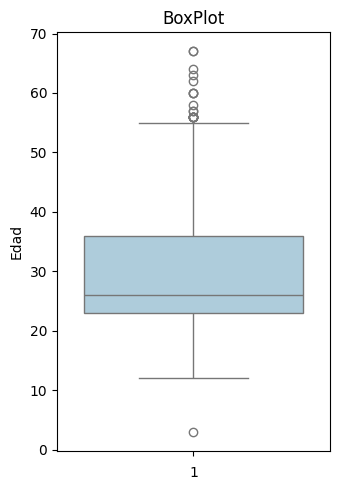

In [ ]:
fig = plt.subplots(1, figsize=(3.5,5))

axes = sns.boxplot(data=df, y='Edad', linewidth=1)
axes.set_title('BoxPlot', fontsize=12)
axes.set_xlabel('1', fontsize=10)
axes.set_ylabel('Edad', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

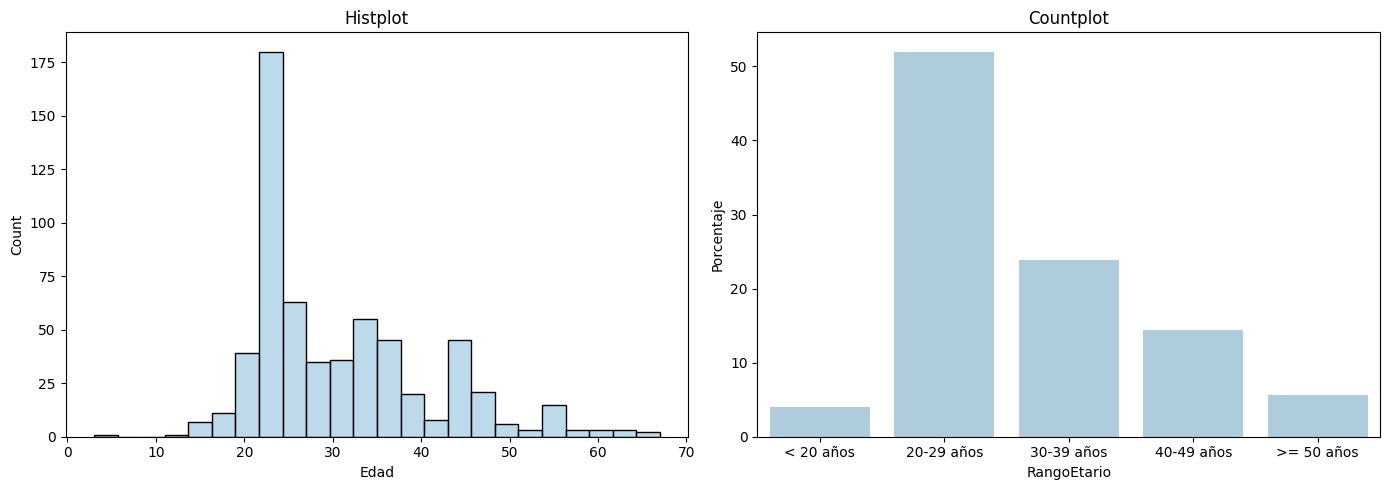

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(data=df, x='Edad', bins=24, ax=axes[0])
axes[0].set_title('Histplot', fontsize=12)
axes[0].set_xlabel('Edad', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.countplot(data=df, x='RangoEtario', order=['< 20 años', '20-29 años', '30-39 años', '40-49 años', '>= 50 años'], stat='percent', ax=axes[1])
axes[1].set_title('Countplot', fontsize=12)
axes[1].set_xlabel('RangoEtario', fontsize=10)
axes[1].set_ylabel('Porcentaje', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

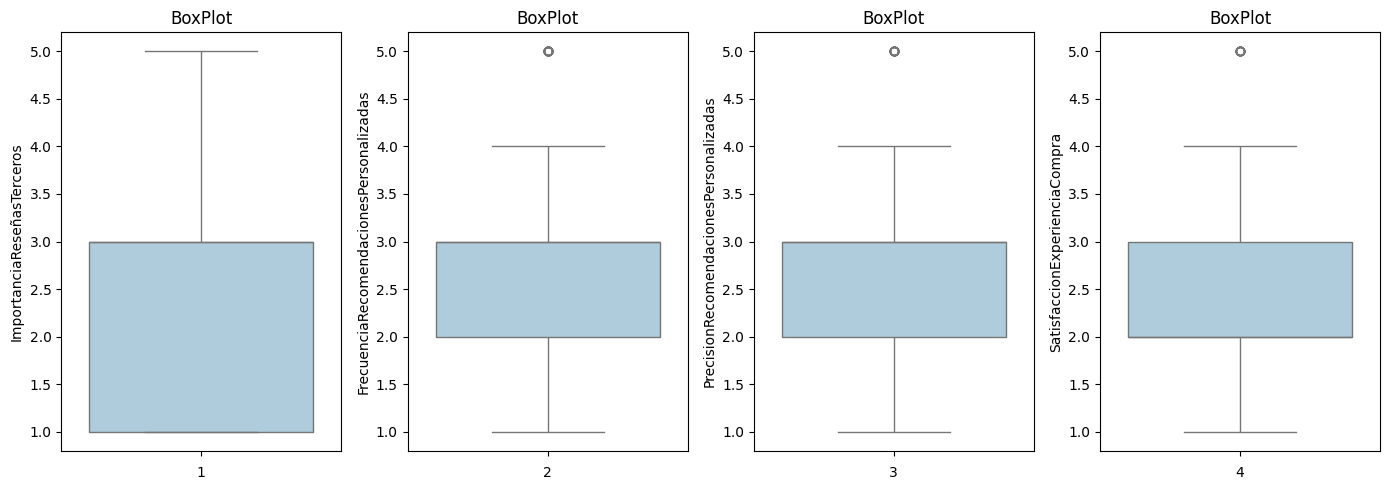

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.boxplot(data=df, y='ImportanciaReseñasTerceros', linewidth=1, ax=axes[0])
axes[0].set_title('BoxPlot', fontsize=12)
axes[0].set_xlabel('1', fontsize=10)
axes[0].set_ylabel('ImportanciaReseñasTerceros', fontsize=10)

sns.boxplot(data=df, y='FrecuenciaRecomendacionesPersonalizadas', linewidth=1, ax=axes[1])
axes[1].set_title('BoxPlot', fontsize=12)
axes[1].set_xlabel('2', fontsize=10)
axes[1].set_ylabel('FrecuenciaRecomendacionesPersonalizadas', fontsize=10)

sns.boxplot(data=df, y='PrecisionRecomendacionesPersonalizadas', linewidth=1, ax=axes[2])
axes[2].set_title('BoxPlot', fontsize=12)
axes[2].set_xlabel('3', fontsize=10)
axes[2].set_ylabel('PrecisionRecomendacionesPersonalizadas', fontsize=10)

sns.boxplot(data=df, y='SatisfaccionExperienciaCompra', linewidth=1, ax=axes[3])
axes[3].set_title('BoxPlot', fontsize=12)
axes[3].set_xlabel('4', fontsize=10)
axes[3].set_ylabel('SatisfaccionExperienciaCompra', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

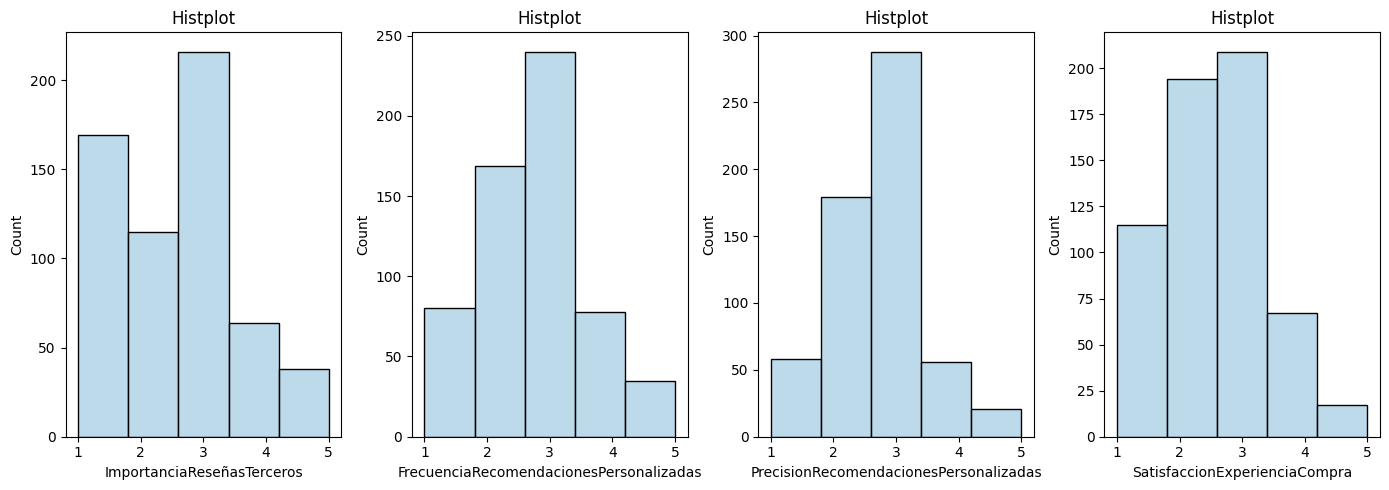

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.histplot(data=df, x='ImportanciaReseñasTerceros', bins=5, ax=axes[0])
axes[0].set_title('Histplot', fontsize=12)
axes[0].set_xlabel('ImportanciaReseñasTerceros', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='FrecuenciaRecomendacionesPersonalizadas', bins=5, ax=axes[1])
axes[1].set_title('Histplot', fontsize=12)
axes[1].set_xlabel('FrecuenciaRecomendacionesPersonalizadas', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='PrecisionRecomendacionesPersonalizadas', bins=5, ax=axes[2])
axes[2].set_title('Histplot', fontsize=12)
axes[2].set_xlabel('PrecisionRecomendacionesPersonalizadas', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='SatisfaccionExperienciaCompra', bins=5, ax=axes[3])
axes[3].set_title('Histplot', fontsize=12)
axes[3].set_xlabel('SatisfaccionExperienciaCompra', fontsize=10)
axes[3].set_ylabel('Count', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

------------------------------------

In [ ]:
df2 = df.copy()

In [ ]:
# eliminar atributos
df2.drop(['MarcaTiempo', 'CategoriaProductosComprados'], axis=1, inplace=True)

In [ ]:
categoricalColB = df2.select_dtypes("object").columns

In [ ]:
# codificar variables tipo object a valor numerico
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for i in range(len(categoricalColB)):
  df2[categoricalColB[i]] = le.fit_transform(df2[categoricalColB[i]])

#le.classes_ # clases

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Edad                                     602 non-null    int64
 1   Genero                                   602 non-null    int64
 2   FrecuenciaBusqueda                       602 non-null    int64
 3   MetodoBusqueda                           602 non-null    int64
 4   ExploracionResultadoBusquedas            602 non-null    int64
 5   AgregasMientrasBuscas                    602 non-null    int64
 6   GuardasCarritoDespues                    602 non-null    int64
 7   ComprasCuandoAgregas                     602 non-null    int64
 8   FactoresAbandonoCarrito                  602 non-null    int64
 9   ReseñasTercerosConfiables                602 non-null    int64
 10  ReseñasTercerosUtiles                    602 non-null    int64
 11  Import

In [ ]:
df2.sample(5)

,Edad,Genero,FrecuenciaBusqueda,MetodoBusqueda,ExploracionResultadoBusquedas,AgregasMientrasBuscas,GuardasCarritoDespues,ComprasCuandoAgregas,FactoresAbandonoCarrito,ReseñasTercerosConfiables,ReseñasTercerosUtiles,ImportanciaReseñasTerceros,RealizasReseñas,FrecuenciaRecomendacionesPersonalizadas,RecomendacionesPersonalizadasUtiles,PrecisionRecomendacionesPersonalizadas,ComprasRecomendacionesPersonalizadas,FrecuenciaCompra,ServiciosMasApreciados,SatisfaccionExperienciaCompra,AreasMejora
213,36,0,1,1,1,2,2,4,1,1,1,4,1,3,2,2,2,0,2,1,11
127,25,0,1,0,0,1,4,2,1,0,0,2,1,2,2,3,2,4,5,2,2
232,29,0,2,1,1,2,1,2,1,1,2,1,1,2,1,2,2,4,8,2,2
557,43,1,1,0,1,1,2,2,0,1,0,2,1,2,0,2,0,0,2,2,11
438,34,1,0,3,1,0,2,2,3,1,1,4,0,2,1,3,1,4,2,2,11


<Axes: >

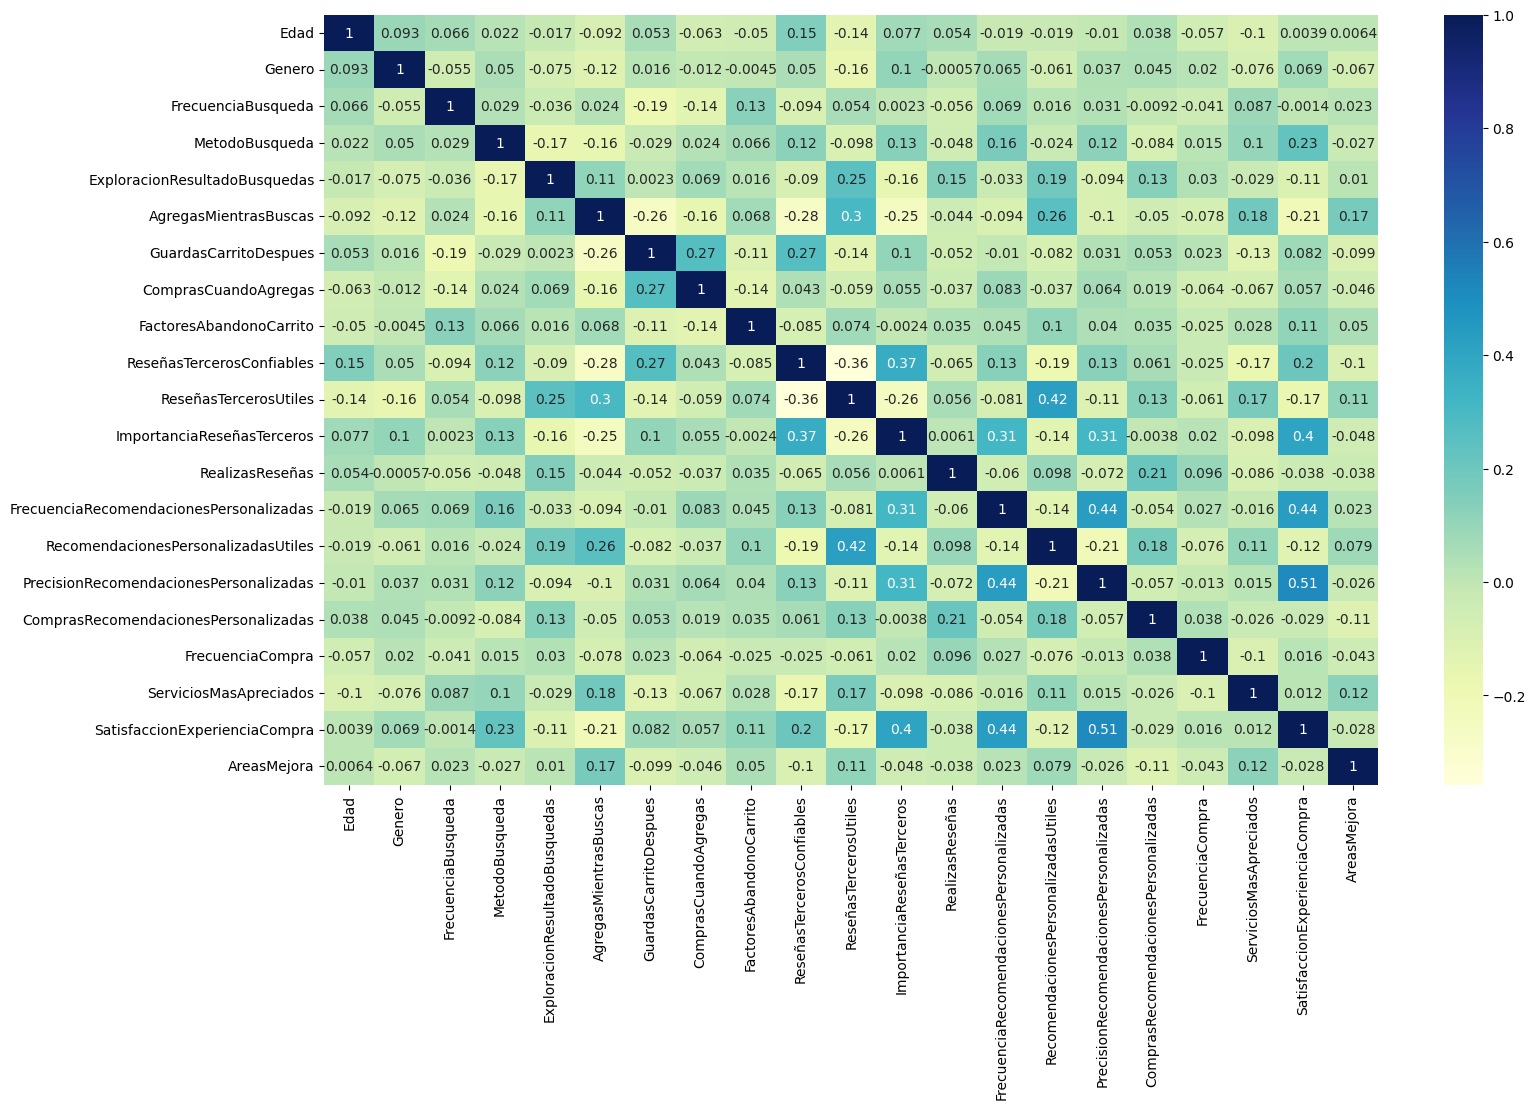

In [ ]:
# matrix de correlacion
fig=plt.figure(figsize=(17,10))
sns.heatmap(df2.corr(), annot=True, cmap='YlGnBu')